In [1]:
import numpy as np

def bagiTitik(P,P1,P2,I): #Bagi kumpulan titik(P) pada indeks I menjadi 2 bagian berdasarkan garis P1P2
    indexKiriAtas = []
    indexKananBawah = []
    A = P[P1][0]*P[P2][1]
    B = P[P2][0]*P[P1][1]
    for i in I:
        if i != P1 and i != P2:
            #Cek determinan
            det = A + P[i][0]*P[P1][1] + P[P2][0]*P[i][1] - P[i][0]*P[P2][1] - B - P[P1][0]*P[i][1]
            if det > 0: #titik berada di atas atau di sebelah kiri dari garis P1P2
                indexKiriAtas.append(i)
            if det < 0: #titik berada di bawah atau di sebelah kanan dari garis P1P2
                indexKananBawah.append(i)
    return indexKiriAtas, indexKananBawah

def findFar(P,I,P1,P2): #Cari titik terjauh dari garis P1P2 
    distance = []
    numArray = np.array(P)
    A = np.linalg.norm(numArray[P2]-numArray[P1])
    for i in I: #Hitung jarak tiap titik
        d = np.linalg.norm(np.cross(numArray[P2]-numArray[P1],numArray[P1]-numArray[i]))/A
        distance.append(d)
    furthest = max(distance) #Cari jarak terjauh
    for i in range(len(distance)): #Cari indeks dari titik dengan jarak terjauh
        if distance[i] == furthest:
            loc = i
            break
    return I[loc]

def findHull(P,Pt,P1,P2): #Cari Convex Hull
    if len(Pt) == 0: #BASIS : kembalikan pasangan P1-P2 jika tidak ada titik lagi
        return [[P1,P2]]
    elif len(Pt) == 1: #BASIS : jika hanya ada satu titik (Pt), kembalikan pasangan P1-Pt dan Pt-P2
        return [[P1,Pt[0]],[Pt[0],P2]]
    else:
        C = []
        Pn = findFar(P,Pt,P1,P2) #Cari titik terjauh (Pn) dari garis P1-P2
        kiri1,kanan1 = bagiTitik(P,P1,Pn,Pt) #bagi sekumpulan titik berdasarkan garis P1-Pn
        kiri2,kanan2 = bagiTitik(P,Pn,P2,Pt) #bagi sekumpulan titik berdasarkan garis Pn-P2
        A = findHull(P,kiri1,P1,Pn) #Cari Convex Hull dari bagian yang dibagi garis P1-Pn
        B = findHull(P,kiri2,Pn,P2) #Cari Convex Hull dari bagian yang dibagi garis Pn-P2
        #Gabung hasil dari kedua pencarian convex hull
        for index in A:
            C.append(index)
        for index in B:
            C.append(index)
        return C

def ConvexHull(P): #Fungsi pencarian ConvexHull
    P1 = 0
    P2 = 0
    I = []
    for i in range(len(P)): #cari titik dengan absis terkecil dan terbesar
        if P[i][0] <= P[P1][0]:
            P1 = i
        if P[i][0] >= P[P2][0]:
            P2 = i
        I.append(i)
    hull = []
    #Bagi kumpulan titik jadi bagian atas dan bawah garis P1-P2
    kiriAtas, kananBawah = bagiTitik(P,P1,P2,I)
    A = findHull(P,kiriAtas,P1,P2) #Cari convex hull untuk bagian atas garis P1-P2
    B = findHull(P,kananBawah,P2,P1) #Cari convex hull untuk bagian bawah garis P1-P2
    #Gabung hasil convex hull
    for index in A:
        hull.append(index)
    for index in B:
        hull.append(index)
    return hull

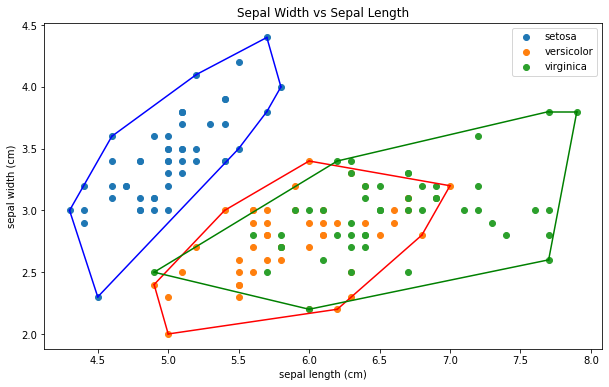

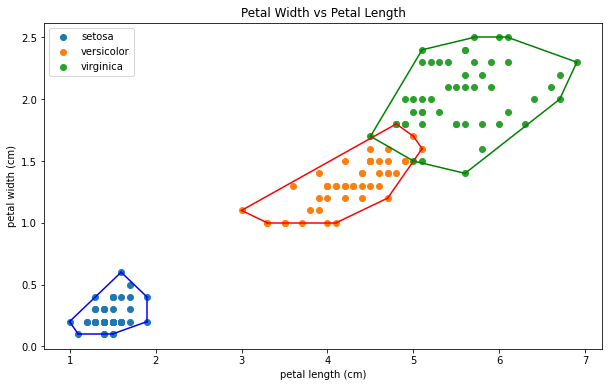

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#Visualisasi data iris
data = datasets.load_iris()
#Buat DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

#Visualisasi Sepal Width vs Sepal Length
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

#Visualisasi Petal Width vs Petal Length
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

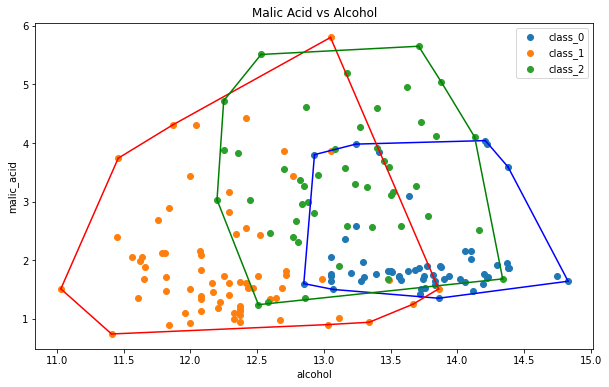

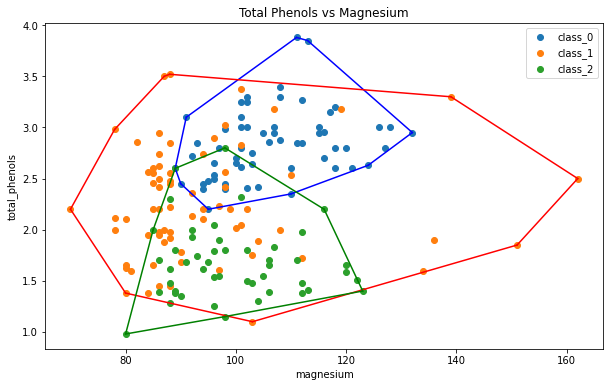

In [3]:
#Visualisasi data wine
data = datasets.load_wine()
#Buat DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

#Visualisasi Malic Acid vs Alcohol
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Malic Acid vs Alcohol')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

#Visualisasi Total Phenols vs Magnesium
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Total Phenols vs Magnesium')
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[4,5]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

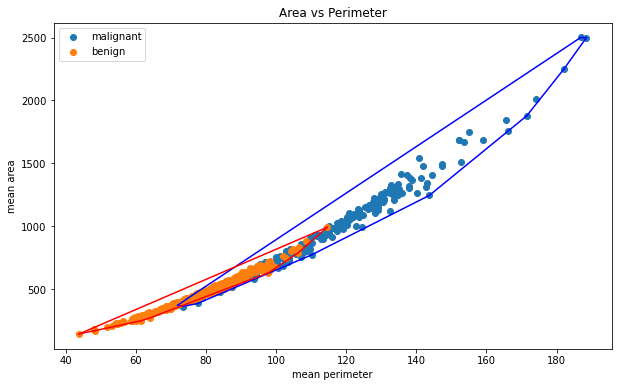

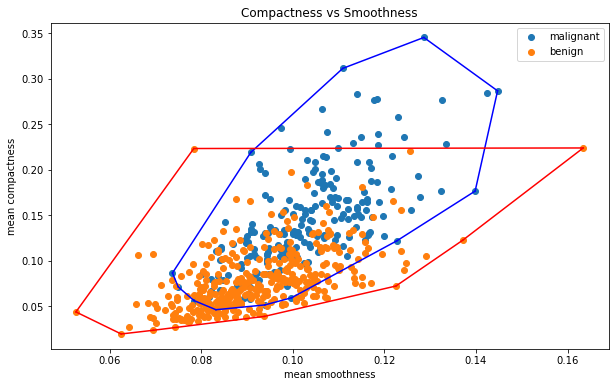

In [4]:
#Visualisasi data breast_cancer
data = datasets.load_breast_cancer()
#Buat DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

#Visualisasi Area vs Perimeter
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Area vs Perimeter')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()

#Visualisasi Compactness vs Smoothness
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Compactness vs Smoothness')
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[4,5]].values
    hull = ConvexHull(bucket) #Penggunaan pustaka MyConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()
plt.show()